<a href="https://colab.research.google.com/github/fighaz/MachineLearning_2024/blob/main/JS3ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA :SOFISUGIHARTO ZAINI

KELAS:TI-3C

ABSEN:25

# Praktikum 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


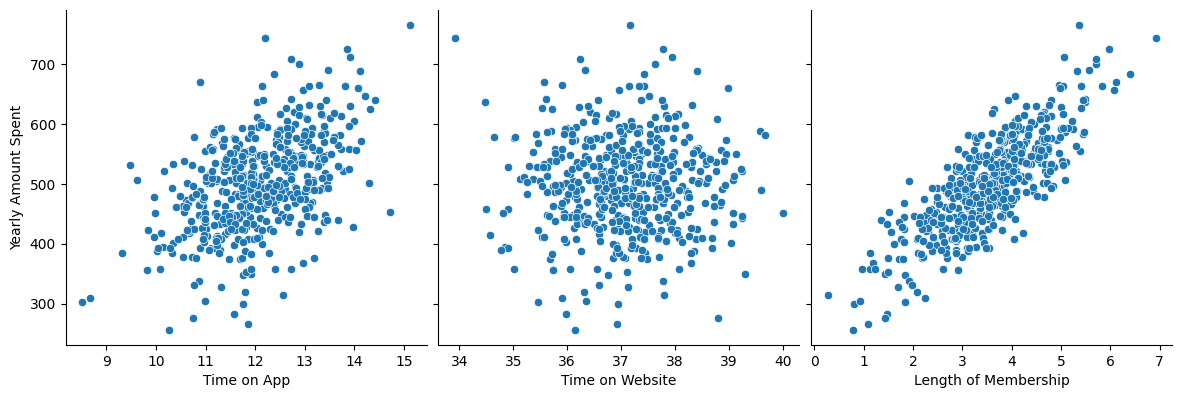

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

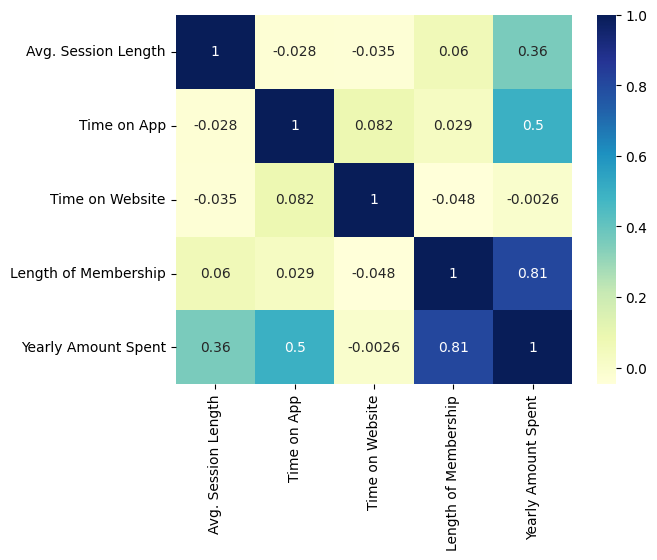

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

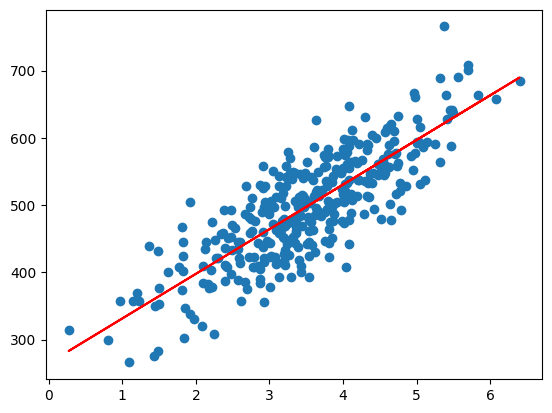

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

<ipython-input-14-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


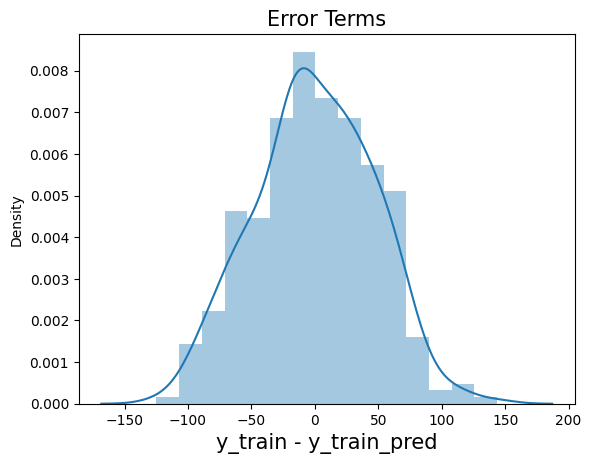

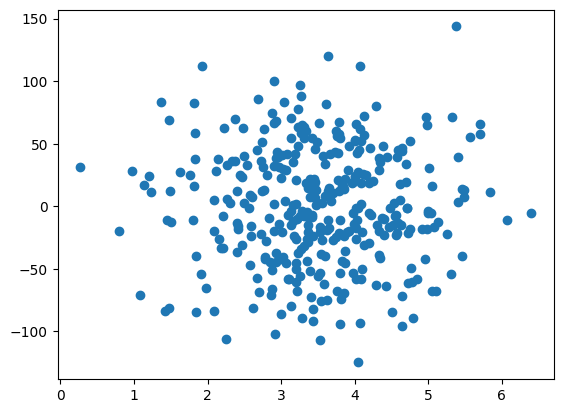

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

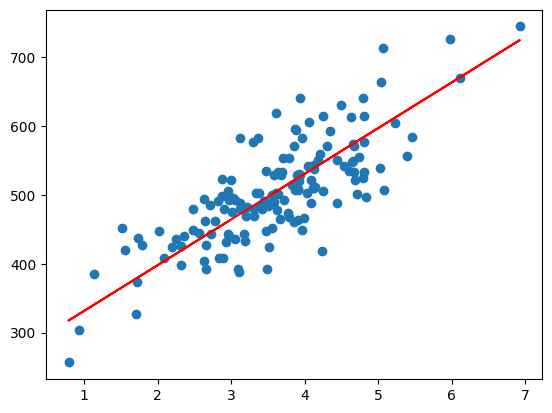

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# PRAKTIKUM 2

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-21-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


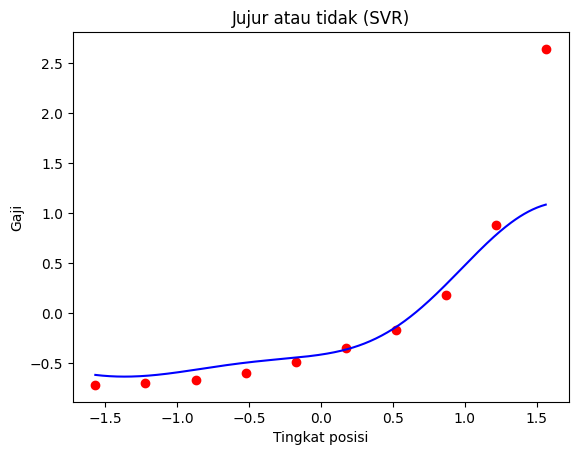

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# TUGAS PRAKTIKUM

Read Data

In [ ]:
data1 = pd.read_csv('insurance.csv')
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Plot Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


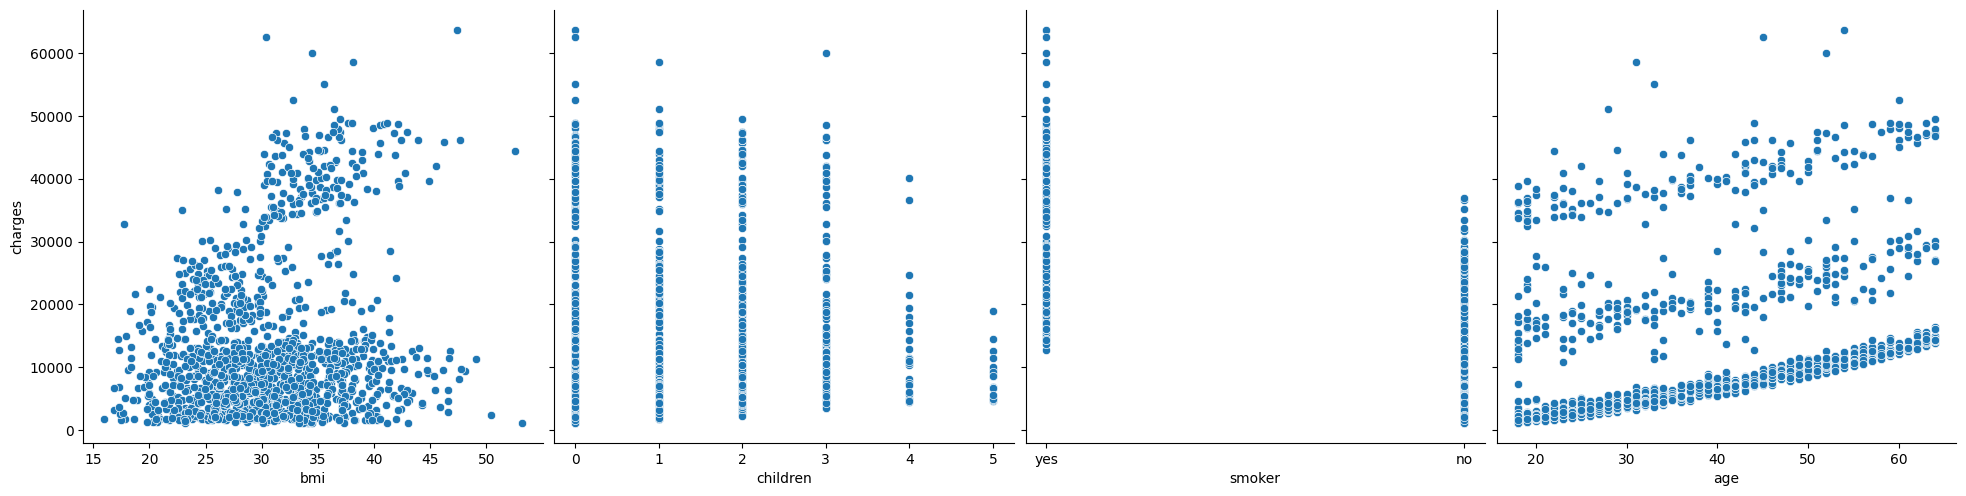

In [ ]:
sns.pairplot(data1, x_vars=['bmi', 'children', 'smoker','age'],
             y_vars='charges', size=5, aspect=1, kind='scatter')
plt.show()

Labeling dan Split Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # membuat objek dari LabelEncoder
data1['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data1.head()
data1 = data1.drop(columns=['sex','region'])
X = data1.drop(columns=['charges'])
y = data1['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Train Data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)

Evaluasi

In [ ]:
# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared (R2): {r2:.2f}")
# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
# Menghitung RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R-squared (R2): 0.78
MAE: 3895.874830171531
MSE: 31925237.256545257
RMSE: 5650.242229899994


Hasil Prediksi

In [ ]:
print("Hasil Prediksi Charges Insurance:")
for i in range(len(y_pred)):
    print(f"Data Test {i + 1}: Prediksi ${y_pred[i]:.2f}, Target ${list(y_test)[i]:.2f}")


Hasil Prediksi Charges Insurance:
Data Test 1: Prediksi $4823.52, Target $1826.84
Data Test 2: Prediksi $5127.29, Target $20177.67
Data Test 3: Prediksi $8400.82, Target $7421.19
Data Test 4: Prediksi $3227.04, Target $1877.93
Data Test 5: Prediksi $24943.68, Target $15518.18
Data Test 6: Prediksi $37345.76, Target $29523.17
Data Test 7: Prediksi $14559.51, Target $13143.86
Data Test 8: Prediksi $2821.16, Target $3279.87
Data Test 9: Prediksi $30057.46, Target $18972.49
Data Test 10: Prediksi $15800.61, Target $12950.07
Data Test 11: Prediksi $15166.00, Target $8083.92
Data Test 12: Prediksi $5201.31, Target $18218.16
Data Test 13: Prediksi $10966.16, Target $8334.46
Data Test 14: Prediksi $4284.00, Target $2727.40
Data Test 15: Prediksi $9832.21, Target $7441.05
Data Test 16: Prediksi $32335.75, Target $38711.00
Data Test 17: Prediksi $11997.66, Target $10338.93
Data Test 18: Prediksi $13189.59, Target $11552.90
Data Test 19: Prediksi $7318.02, Target $4751.07
Data Test 20: Prediksi $